<a href="https://colab.research.google.com/github/jocelynbaduria/Technical-Exam/blob/main/Technical_Exam_Jocelyn_Baduria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [707]:
!pip install datatable

In [708]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datatable as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

In [709]:
DT = dt.fread('/content/drive/MyDrive/Technical Exam - Senior AI Machine Learning Engineer (2).zip (Unzipped Files)/sentiment_test_cases_1.csv')

In [710]:
data_pd = DT.to_pandas()

In [711]:
#Convert the csv file into pandas dataframe
DT.head()

,expected_sentiment,text
,▪▪▪▪,▪▪▪▪
0,positive,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its…"
1,positive,Reading my kindle2... Love it... Lee childs is good read.
2,positive,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!"
3,positive,@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new …
4,positive,@mikefish Fair enough. But i have the Kindle2 and I think it's perfect :)
5,positive,@richardebaker no. it is too big. I'm quite happy with the Kindle2.
6,negative,Fuck this economy. I hate aig and their non loan given asses.
7,positive,Jquery is my new best friend.
8,positive,Loves twitter


In [712]:
data_pd.head()

,expected_sentiment,text
0,positive,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,positive,Reading my kindle2... Love it... Lee childs i...
2,positive,"Ok, first assesment of the #kindle2 ...it fuck..."
3,positive,@kenburbary You'll love your Kindle2. I've had...
4,positive,@mikefish Fair enough. But i have the Kindle2...


In [713]:
# Pandas read csv not working
# dataset = pd.read_csv("/content/drive/MyDrive/Technical Exam - Senior AI Machine Learning Engineer (2).zip (Unzipped Files)/sentiment_test_cases_1.csv", index_col=0, sep='\t')

In [714]:
# dataset = dataset[["expected_sentiment","text"]]
# dataset["expected_sentiment","text"] = dataset["expected_sentiment","text"].astype(str)
# dataset.head()

In [715]:
# dataset.head()

Swap the columns text and expected_sentiment

In [716]:
column_names = ['text', 'expected_sentiment']

In [717]:
data_pd = data_pd.reindex(columns=column_names)

In [718]:
print(data_pd)

                                                  text expected_sentiment
0    @stellargirl I loooooooovvvvvveee my Kindle2. ...           positive
1    Reading my kindle2...  Love it... Lee childs i...           positive
2    Ok, first assesment of the #kindle2 ...it fuck...           positive
3    @kenburbary You'll love your Kindle2. I've had...           positive
4    @mikefish  Fair enough. But i have the Kindle2...           positive
..                                                 ...                ...
493  Ask Programming: LaTeX or InDesign?: submitted...            neutral
494  On that note, I hate Word. I hate Pages. I hat...           negative
495  Ahhh... back in a *real* text editing environm...           positive
496  Trouble in Iran, I see. Hmm. Iran. Iran so far...           negative
497  Reading the tweets coming out of Iran... The w...           negative

[498 rows x 2 columns]


In [719]:
print(data_pd[0:20])

                                                 text expected_sentiment
0   @stellargirl I loooooooovvvvvveee my Kindle2. ...           positive
1   Reading my kindle2...  Love it... Lee childs i...           positive
2   Ok, first assesment of the #kindle2 ...it fuck...           positive
3   @kenburbary You'll love your Kindle2. I've had...           positive
4   @mikefish  Fair enough. But i have the Kindle2...           positive
5   @richardebaker no. it is too big. I'm quite ha...           positive
6   Fuck this economy. I hate aig and their non lo...           negative
7                       Jquery is my new best friend.           positive
8                                       Loves twitter           positive
9   how can you not love Obama? he makes jokes abo...           positive
10  Check this video out -- President Obama at the...            neutral
11  @Karoli I firmly believe that Obama/Pelosi hav...           negative
12  House Correspondents dinner was last night who.

In [720]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data_pd['expected_sentiment'])

# printing label
label

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0,
       2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1,

Cleaning the text for preparation of sentiment analysis

In [721]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [722]:
for i in range(0, 498):
  review = re.sub('[^a-zA-Z]', ' ', data_pd['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [723]:
print(corpus[0:5])

['stellargirl loooooooovvvvvvee kindl not dx cool fantast right', 'read kindl love lee child good read', 'ok first asses kindl fuck rock', 'kenburbari love kindl mine month never look back new big one huge need remors', 'mikefish fair enough kindl think perfect']


Creating Bag of Words

In [724]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 498)
X = cv.fit_transform(corpus).toarray()
y = data_pd.iloc[:, -1].values

In [725]:
print(X.shape)
print(y.shape)

(498, 498)
(498,)


Splitting the Dataset into Taining and test set

In [726]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Training the Naive Bayes model on the Training set

In [727]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Predicting the Test set results

In [728]:
model_prediction = model.predict(X_test)
print(np.concatenate((model_prediction.reshape(len(model_prediction),1), y_test.reshape(len(y_test),1)),1))

[['negative' 'negative']
 ['neutral' 'positive']
 ['neutral' 'neutral']
 ['negative' 'positive']
 ['positive' 'negative']
 ['positive' 'positive']
 ['negative' 'positive']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['negative' 'neutral']
 ['negative' 'neutral']
 ['negative' 'negative']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['negative' 'neutral']
 ['negative' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['neutral' 'positive']
 ['positive' 'neutral']
 ['positive' 'negative']
 ['positive' 'positive']
 ['negative' 'neutral']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['negative' 'negative']
 ['neutral' 'negative']
 ['neutral' 'neutral']
 ['positive' 'positive']
 ['neutral' 'positive']
 ['negative' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['neutral' 'neutral']
 ['neutral' 'neutral']
 ['positive' 'neutral']
 ['positive' 'positive']
 ['positive' 'positive']
 ['

Making the Confusion Matrix

Accuracy: 0.62
F1 Score: 0.6209171948476794
              precision    recall  f1-score   support

    negative       0.58      0.62      0.60        29
     neutral       0.59      0.54      0.57        35
    positive       0.68      0.69      0.68        36

    accuracy                           0.62       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.62      0.62      0.62       100



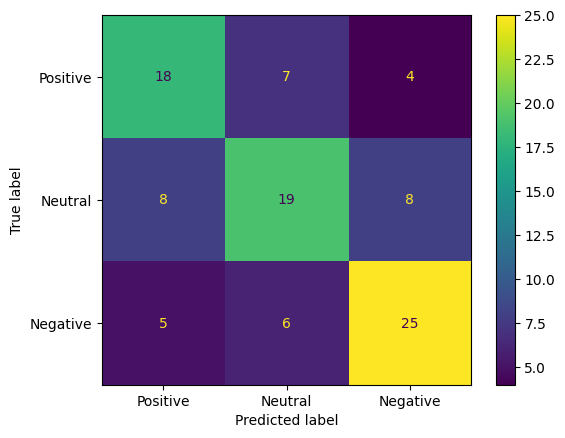

In [729]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report

labels = ["Positive", "Neutral", "Negative"]
cm = confusion_matrix(y_test, model_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

accuracy = accuracy_score(y_test, model_prediction)
f1 = f1_score(model_prediction, y_test, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, model_prediction))

Model Evaluation using Test Data

In [730]:
model_prediction = model.predict([X_test[8]])

print("Actual Value:", data_pd.text[8])
print("Predicted Value:", model_prediction[0])

Actual Value: Loves twitter
Predicted Value: neutral


In [731]:
model_prediction = model.predict([X_test[10]])

print("Actual Value:", data_pd.text[10])
print("Predicted Value:", model_prediction[0])

Actual Value: Check this video out -- President Obama at the White House Correspondents' Dinner http://bit.ly/IMXUM
Predicted Value: negative


Model Evaluation Using New Data

In [732]:
my_sentence = input('')
print((my_sentence, model_prediction[0], "Confidence_Score:", accuracy))

I like having morning coffee
('I like having morning coffee', 'negative', 'Confidence_Score:', 0.62)


In [733]:
my_sentence = "I love you"
print((my_sentence, model_prediction[0], "Confidence_Score:", accuracy))

('I love you', 'negative', 'Confidence_Score:', 0.62)


In [734]:
my_sentence = "Thats kind of annoying!"
print((my_sentence, model_prediction[0], "Confidence_Score:", accuracy))

('Thats kind of annoying!', 'negative', 'Confidence_Score:', 0.62)


In [735]:
my_sentence = "I hate going to that restaurant"
print((my_sentence, model_prediction[0], "Confidence_Score:", accuracy))

('I hate going to that restaurant', 'negative', 'Confidence_Score:', 0.62)
